In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
#These are the visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means module.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We need to save the models. We'll use pickle for that.
import pickle
# We import the Logistic Regression module from sk learn for the purchase probability model.
from sklearn.linear_model import LogisticRegression
# We import the Linear Regression module from sk learn for the quantity model.
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings
filterwarnings("ignore")

# ${\textbf{Data Segmentation}}$

## ${\textbf{Import Data}}$

In [2]:
# Load the data, contained in the segmentation data csv file.
df_segmentation = pd.read_csv('segmentation data.csv', index_col = 0)

## ${\textbf{Explore Data}}$

In [3]:
# Descriptive analysis of the data set. Here we just look at the data to gain some insight. 
# We do not apply any transformations or changes to the data.
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
# Numper of rows and columns
df_segmentation.shape

(2000, 7)

In [5]:
# Data information
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [6]:
# Show summary of statistics
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
#df_segmentation[['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']] = df_segmentation[['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']].apply(lambda x: x.astype('category'))

## ${\textbf{Correlation Estimate}}$

In [8]:
# Compute Pearson correlation coefficient for the features in our data set.
# The correlation method in pandas, it has the Pearson correlation set as default.
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


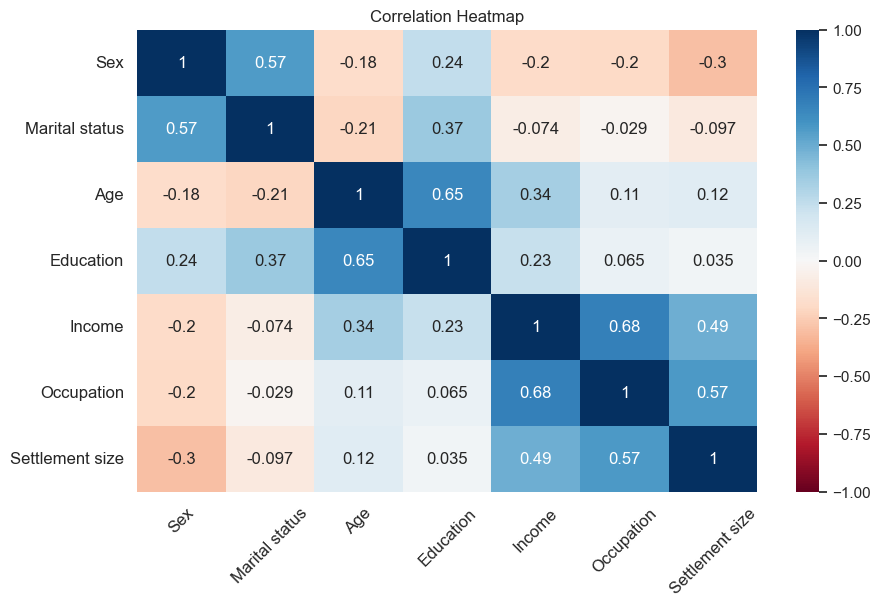

In [9]:
# We'll plot the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.
# We use RdBu as a color scheme, but you can use viridis, Blues, YlGnBu or many others.
# We set the range from -1 to 1, as it is the range of the Pearson Correlation. 
# Otherwise the function infers the boundaries from the input.
# In this case they will be -0,25 to 0,68, as they are the minumum and maximum correlation indeces between our features.
plt.figure(figsize= (10, 6))
s = sns.heatmap(df_segmentation.corr(),
               annot= True, 
               cmap= 'RdBu',
               vmin= -1, 
               vmax= 1)
s.set_yticklabels(s.get_yticklabels(), rotation= 0, fontsize= 12)
s.set_xticklabels(s.get_xticklabels(), rotation= 45, fontsize= 12)
plt.title('Correlation Heatmap');

## ${\textbf{Visualize Raw Data}}$

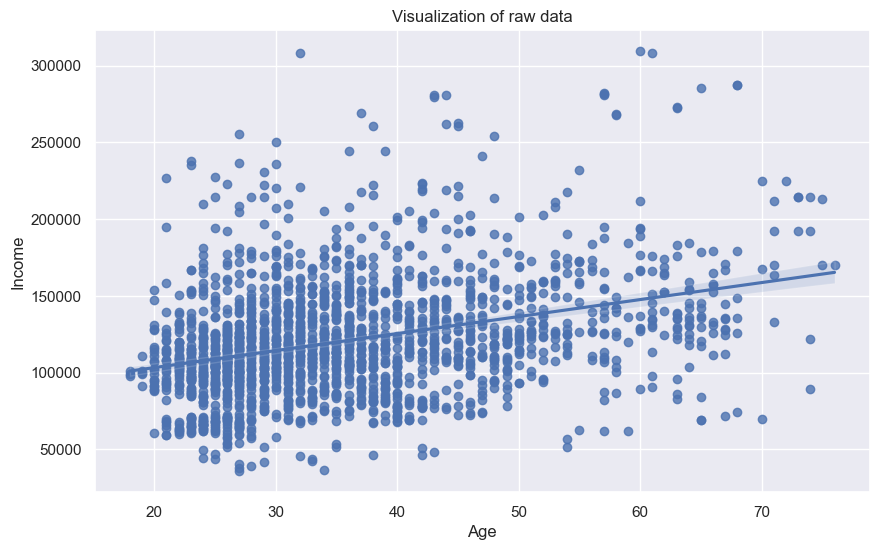

In [10]:
# We'll plot the data. We create a 10 by 6 inches figure.
# We have 2000 data points, which we'll scatter acrros Age and Income, located on positions 2 and 4 in our data set. 
plt.figure(figsize= (10, 6))
sns.regplot(x= df_segmentation.Age, y= df_segmentation.Income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data');

## ${\textbf{Standardization}}$

In [11]:
# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, in our case Income would be considered much more important than Education for Instance. 
# We do not know if this is the case, so we would not like to introduce it to our model. 
# This is what is also refered to as bias.
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

### ${\textbf{PCA}}$

In [12]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [13]:
# Fit PCA with our standardized data.
pca.fit(segmentation_std)

PCA()

In [14]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

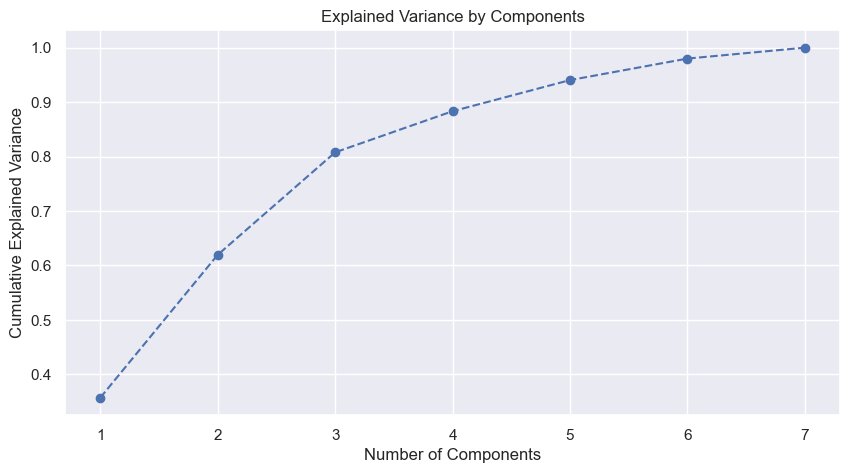

In [15]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize= (10, 5))
plt.plot(range(1, 8), np.cumsum(pca.explained_variance_ratio_), marker= 'o', linestyle= '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [16]:
# calculate number of components percentage that explain 80% of Variance to use it in new pca
cum_variance = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_), columns=['cumulative_variance'], 
                            index=np.arange(1, segmentation_std.shape[1]+1))

print(f"{cum_variance.loc[cum_variance['cumulative_variance'] > 0.8].index[0]} components explain 80% of the variance")

3 components explain 80% of the variance


In [17]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components= 3)

In [18]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(segmentation_std)

PCA(n_components=3)

### ${\textbf{PCA Results}}$

In [19]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
df_pca_comp = pd.DataFrame(data= pca.components_,
                           columns= df_segmentation.columns.values,
                           index= ['component_' + str(i) for i in range(1, len(pca.components_) +1)])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component_1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
component_2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component_3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


In [20]:
print(f"The First Component Explains {np.around(100* np.sum(pca.explained_variance_ratio_[:1]), 2)}% Of The Variance.")

The First Component Explains 35.7% Of The Variance.


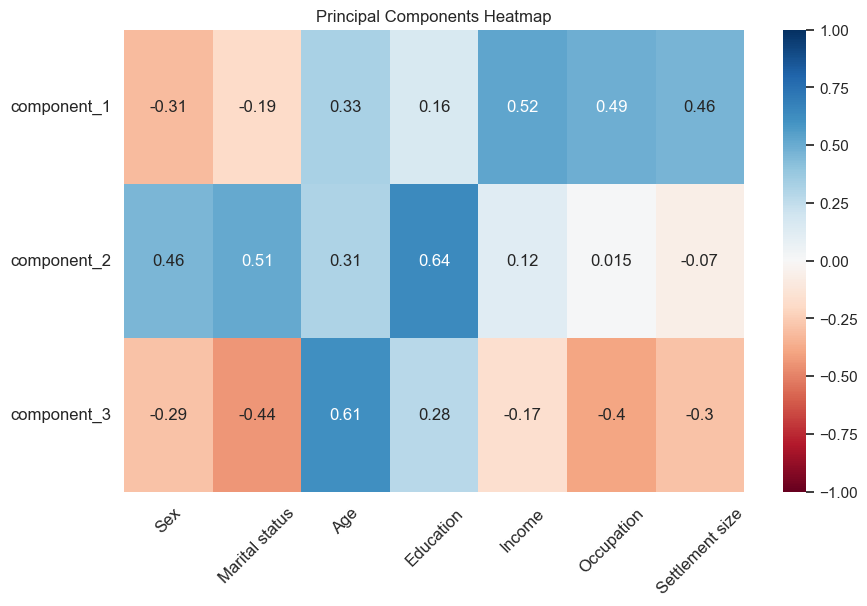

In [21]:
# Heat Map for Principal Components against original features.
plt.figure(figsize= (10, 6))
s = sns.heatmap(df_pca_comp,
               annot= True, 
               cmap= 'RdBu',
               vmin= -1, 
               vmax= 1)
s.set_yticklabels(s.get_yticklabels(), rotation= 0, fontsize= 12)
s.set_xticklabels(s.get_xticklabels(), rotation= 45, fontsize= 12)
plt.title('Principal Components Heatmap');

In [22]:
# create scores_pca dataframe with PCA
scores_pca = pd.DataFrame(pca.transform(segmentation_std), 
                          columns= ['component_' + str(i) for i in range(1, len(pca.components_) +1)])
scores_pca.head()

,component_1,component_2,component_3
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731
4,1.626745,-0.440496,1.244909


## ${\textbf{Hierarchical Clustering}}$

In [23]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(scores_pca, method= 'ward')

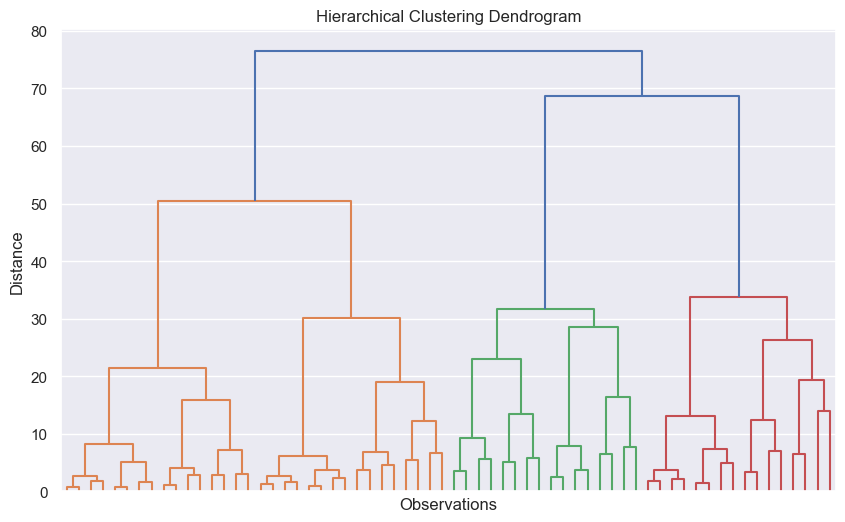

In [24]:
# We plot the results from the Hierarchical Clustering using a Dendrogram. 
# We truncate the dendrogram for better readability. The level p shows only the last p merged clusters
# We also omit showing the labels for each point.
plt.figure(figsize= (10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode= 'level', 
           p= 5, 
           show_leaf_counts= False, 
           no_labels= True);

### the plot seems to show 4 clusters

### ${\textbf{K-means clustering with PCA}}$

In [25]:
# We fit K means using the transformed data from the PCA. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
wcss = []
for n in range(1, 11):
    kmeans_pca = KMeans(n_clusters= n, init= 'k-means++', random_state= 42)
    kmeans_pca.fit(scores_pca)
    wcss.append([n, kmeans_pca.inertia_])

wcss = pd.DataFrame(data= wcss, columns= ['Number of clusters', 'Intertia']).set_index('Number of clusters')

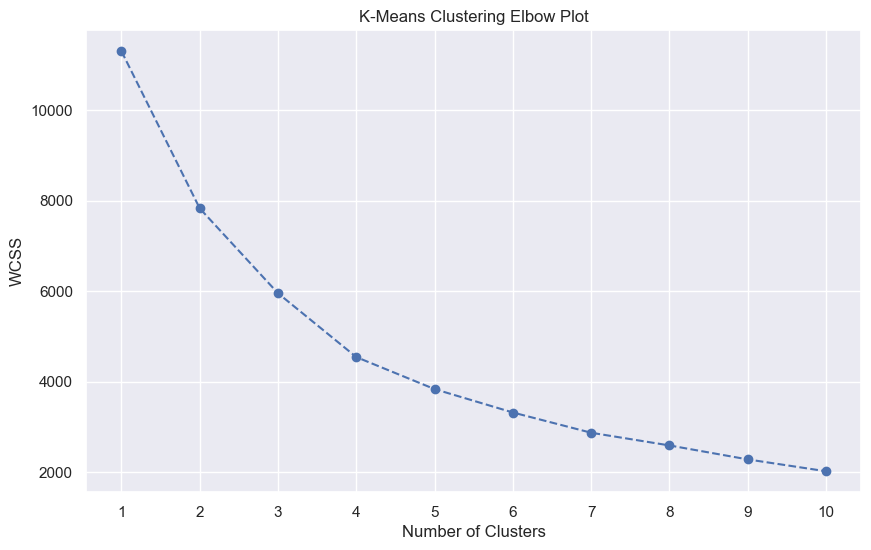

In [26]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize= (10, 6))
plt.plot(wcss, marker= 'o', linestyle= '--')
plt.title('K-Means Clustering Elbow Plot')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.xticks(wcss.index);

### we'll choose 4 clusters as the plot seems to show elbow at this point

In [27]:
# We have chosen four clusters, so we run K-means with number of clusters equals four. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters= 4, init= 'k-means++', random_state= 42)

In [28]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

### ${\textbf{K-means clustering with PCA Results}}$

In [29]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop= True), scores_pca], axis= 1)
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [30]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [31]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()

# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans['Segment K-means PCA'].value_counts()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segmentation.shape[0]
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [32]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({3: 'well-off', 
                                                          2: 'fewer-opportunities', 
                                                          1: 'career focused',
                                                          0: 'standard'}) 
                                                          
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer-opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [33]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({3: 'well-off', 
                                                                              2: 'fewer-opportunities', 
                                                                              1: 'career focused', 
                                                                              0: 'standard'})
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,Segment K-means PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,fewer-opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career focused


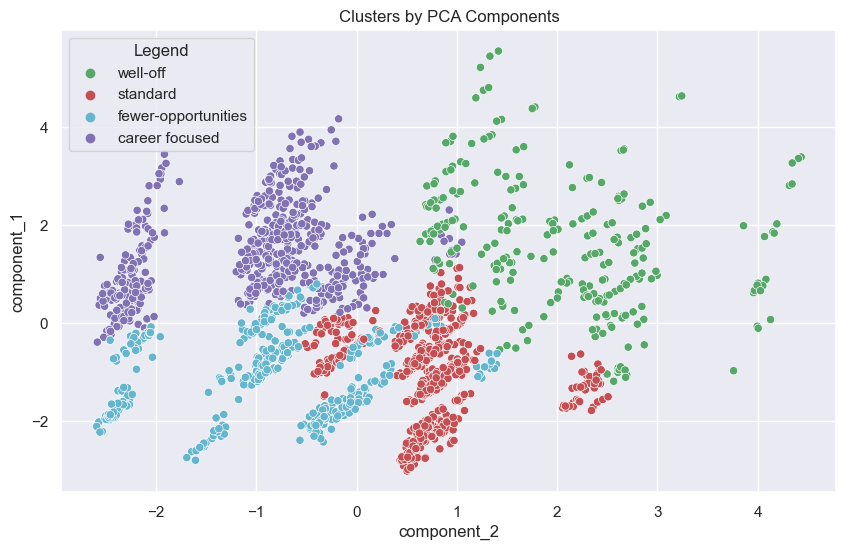

In [34]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
plt.figure(figsize= (10, 6))
sns.scatterplot(data= df_segm_pca_kmeans, x= 'component_2', y= 'component_1', hue= 'Legend', palette= ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components');

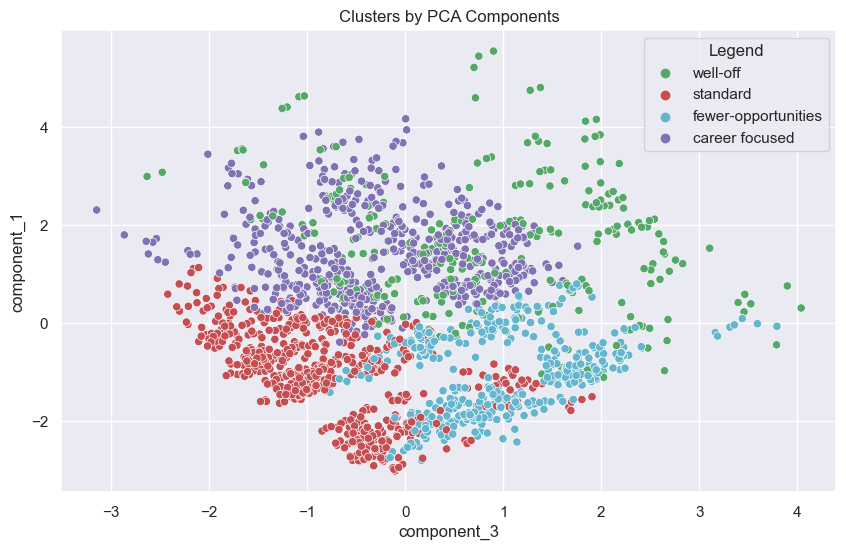

In [35]:
# Plot data by PCA components. The Y axis is the first component, X axis is the third.
plt.figure(figsize= (10, 6))
sns.scatterplot(data= df_segm_pca_kmeans, x= 'component_3', y= 'component_1', hue= 'Legend', palette= ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components');

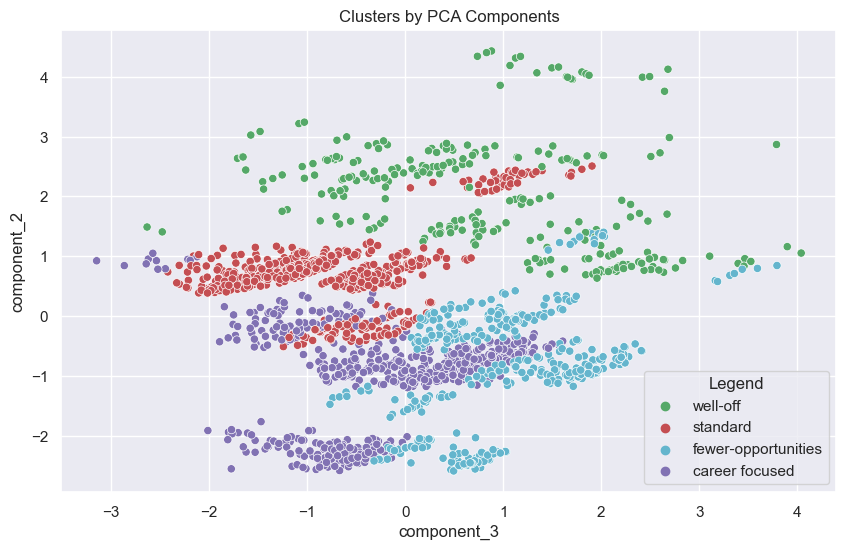

In [36]:
# Plot data by PCA components. The Y axis is the second component, X axis is the third.
plt.figure(figsize= (10, 6))
sns.scatterplot(data= df_segm_pca_kmeans, x= 'component_3', y= 'component_2', hue= 'Legend', palette= ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components');

In [37]:
# We save the objects we'll need in the Purchase Analytics part. We export them as pickle objects.
# We need the scaler, pca and kmeans_pca objects to preprocess and segment the purchase data set.
pickle.dump(scaler, open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))

# ${\textbf{Purchase Analytics Descriptive Analysis}}$

## ${\textbf{Data Import}}$

In [38]:
# Load data. We read the purchase data csv file.
df_purchase = pd.read_csv('purchase data.csv')

## ${\textbf{Data Exploration}}$

In [39]:
# We use the head method on our data and check for missing values.
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [40]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  int64  
 3   Brand              58693 non-null  int64  
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  int64  
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  int64  
 13  Promotion_2        58693 non-null  int64  
 14  Promotion_3        58693 non-null  int64  
 15  Promotion_4        58693 non-null  int64  
 16  Promotion_5        586

### ${\textbf{Import Segmentation Model}}$

In [41]:
# We load our pickled objects in order to segment the purchase data set.
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

### ${\textbf{Standardization}}$

In [42]:
# We standardize the purchase data in the same way we did the segmentation data, using the standard scaler.
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

### ${\textbf{PCA}}$

In [43]:
# We apply pca on the purchase data and obtain 3 principal components for each row in the table. 
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

### ${\textbf{K-means PCA}}$

In [44]:
# Based on the principal components, we use the predict method from Kmeans to segment the purchase data into the four segments.
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [45]:
# Copy resulting data frame as a purchase predictors data frame. 
# We'll be changing the predictors data frame, by adding and changing columns.
# Therefore, we want to keep an original copy.
df_purchase_predictors = df_purchase.copy()

In [46]:
# Add segment information as a new column in our predictors data frame.
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## ${\textbf{Descriptive Analysis by Segments}}$

### ${\textbf{Data Analysis by Customer}}$

In [47]:
# Display first five rows
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [48]:
# Purchase occasions by customer ID
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID']).count()
temp1.rename(columns= {'Incidence': 'N_Visits'}, inplace=True)
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [49]:
# Number of purchases per customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID']).sum()
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp2.head()

,N_Purchases
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13


In [50]:
# Join temp1 and temp2
df_purchase_descr = temp1.join(temp2)
df_purchase_descr.head(1)

,N_Visits,N_Purchases
ID,,
200000001,101,9


In [51]:
# Average number of purchases by customer ID
df_purchase_descr['Average_N_Purchases'] = df_purchase_descr['N_Purchases'] / df_purchase_descr['N_Visits']
df_purchase_descr.head(1)

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109


In [52]:
# We obtain the segment for each customer in the data set.
df_purchase_descr['Segment'] = df_purchase_predictors.drop_duplicates('ID').Segment.values
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1


### ${\textbf{Segment Proportions}}$

In [53]:
# We calculate the proportions of each segment and set the appropriate column name.
segm_prop = (df_purchase_descr['Segment'].value_counts().sort_index() / df_purchase_descr.shape[0]).to_frame()
segm_prop.reset_index(inplace=True)
segm_prop.rename(columns= {'index': 'Segment', 'Segment': 'Segment Proportions'}, inplace=True)
segm_prop.set_index('Segment', inplace=True)
segm_prop.head()

,Segment Proportions
Segment,
0,0.206
1,0.220
2,0.378
3,0.196


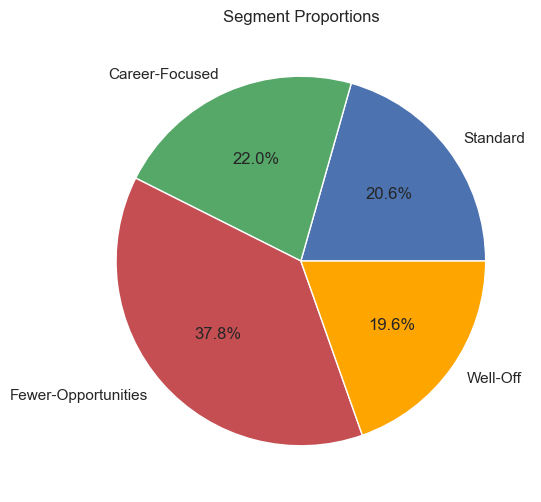

In [54]:
# We plot the segment proportions as a pie chart. 
# We can easily see which is the largest segment and the relative sizes of each segment.
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions');

### ${\textbf{Purchase Occasion and Purchase Incidence}}$

In [55]:
# We calculate the mean by the four segments. It will help us determine the average customer behaivour in each segment.
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [56]:
# We calculate the standard deviation by segments. It will help us determine how homogoneus each of the segments is.
segments_std = df_purchase_descr.groupby(['Segment']).std()
segments_std

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,19.039605,16.774464,0.126603
1,44.864656,53.744530,0.200056
2,16.410498,13.815040,0.120335
3,20.716152,25.900579,0.171787


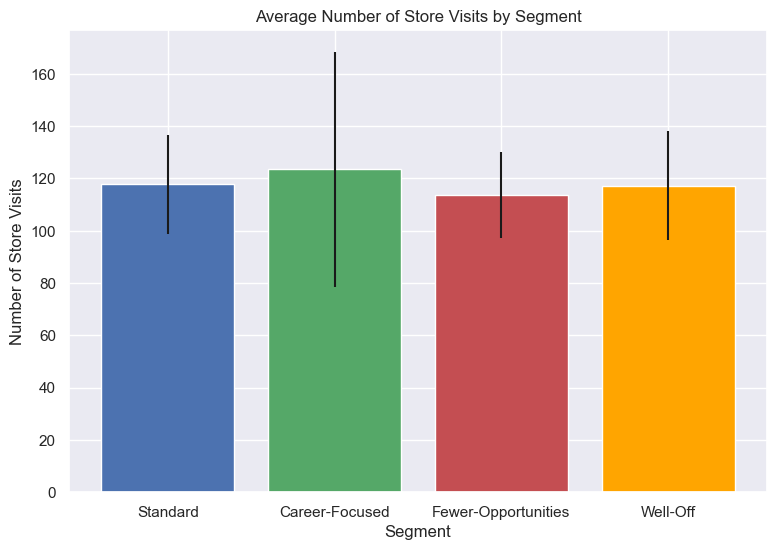

In [57]:
# We plot the average number of store visits for each of the four segments using a bar chart.
# We display the standard deviation as a straight line. The bigger the length, the higher the standard deviation is.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment');

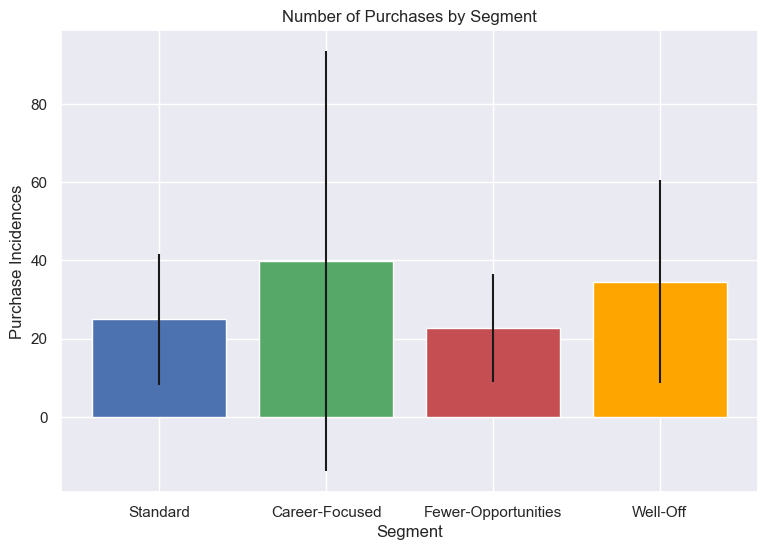

In [58]:
# We display the average number of purchases by segments. 
# They will help us understand how often each group buys.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment');

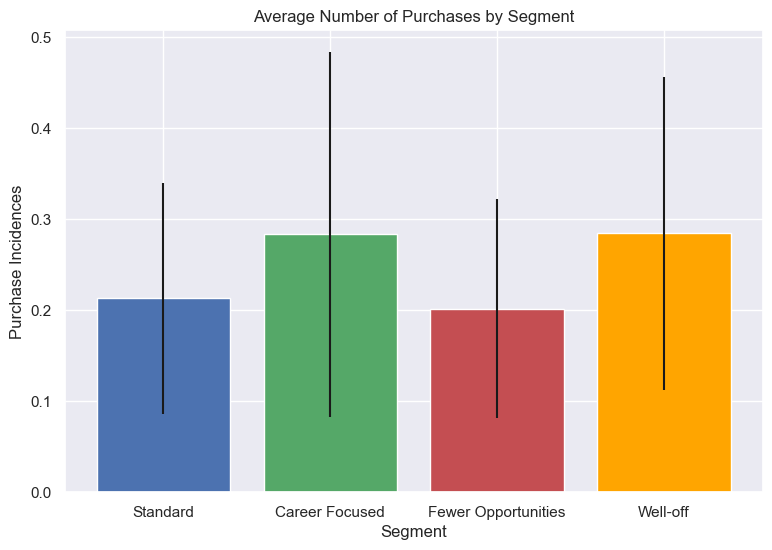

In [59]:
# We display the average number of purchases.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3), 
        tick_label = ('Standard','Career Focused','Fewer Opportunities','Well-off'),
        height = segments_mean['Average_N_Purchases'], 
        yerr = segments_std['Average_N_Purchases'], 
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment');

### ${\textbf{Brand Choice}}$

In [60]:
# Select only rows where incidence is one. In other words, the times a purchase was made.
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [61]:
# Here we make dummies for each of the five brands.
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'] = df_purchase_incidence['Segment']
brand_dummies['ID'] = df_purchase_incidence['ID']
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001


In [62]:
# We calculate the mean of brands by ID then by segments.
mean_brand_choice = brand_dummies.groupby(['ID']).mean().groupby(['Segment']).mean()
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0.0,0.251186,0.396502,0.156481,0.059474,0.136357
1.0,0.072871,0.146808,0.039976,0.112395,0.627951
2.0,0.137567,0.681190,0.020923,0.061548,0.098772
3.0,0.041928,0.117422,0.030610,0.613623,0.196417


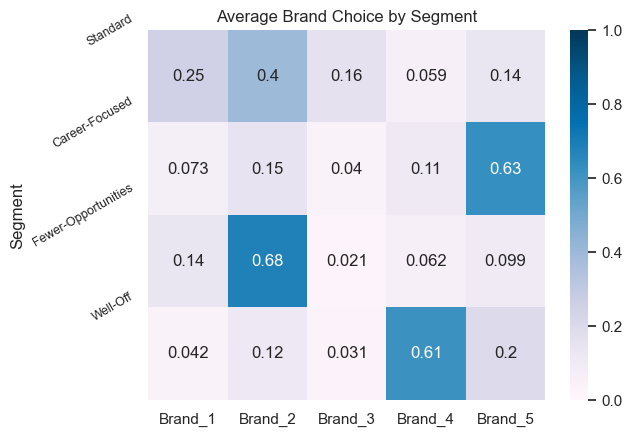

In [63]:
sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'], rotation = 30, fontsize = 9)
plt.title('Average Brand Choice by Segment');

### ${\textbf{Revenue}}$

In [64]:
# Compute the revenue for each brand.
# For each entry where each Brand was purchased, 
# we multiply the price of the brand for that particular day by the quantity of the product purchased.

segments_brand_revenue = pd.DataFrame()

for i in range(1, df_purchase_predictors['Brand'].nunique()): # we exclude 0 because it means no purchase
    temp = df_purchase_predictors[df_purchase_predictors['Brand'] == i]
    temp['Revenue Brand ' + str(i)] = temp['Price_' + str(i)] * temp['Quantity']
    segments_brand_revenue['Revenue Brand ' + str(i)] = temp[['Segment', 'Revenue Brand ' + str(i)]].groupby(['Segment'], as_index = False).sum().loc[:, 'Revenue Brand ' + str(i)]

In [65]:
# We compute the total revenue for each of the segments. We simply sum the revenue for each of the five brands.
segments_brand_revenue['Total Revenue'] = np.sum(segments_brand_revenue, axis= 1)

segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [66]:
# We further modify our table to include the segment proportions. 
# It is interesting to see the size of the segment compared to the revenue they bring.
# We also add the labels for the segments as index
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue.index = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off']
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


# ${\textbf{Purchase Analytics Predictive Analysis}}$

In [67]:
# Add segment dummies to purchase_predictors dataframe
df_purchase_predictors = df_purchase_predictors.join(
                                    pd.get_dummies(df_purchase_predictors['Segment'], prefix = 'Segment', prefix_sep = '_'))

df_pa = df_purchase_predictors
df_pa.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,2,0,0,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,2,0,0,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0


### ${\textbf{Purchase Probability Model}}$

In [68]:
# In order to predict we need input and output variables. 
# Our Y is Incidence, as we want to predict the purchase probability for our customers
Y = df_pa['Incidence']

# Our dependant variable is based on the average price of chocolate candy bars. 
# Therefore, X is a data frame, containing the mean across the five prices.
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [69]:
# We create a Logistic Regression model using sk learn. Then we fit the model with our X or price and our Y or incidence.
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [70]:
# The coefficients for price. It is negative, signaling that with an increase in price, the purchase probability decreases.
model_purchase.coef_

array([[-2.34822555]])

### ${\textbf{Price Elasticity of Purchase Probability}}$

**Price Elasticity of Purchase Probability** = the % change in purchase probability in response to 1% change in price.

In [71]:
# Here we see the prices for the five different brands, which is an important factor in determining purchase probability. 
# It informs the price range, for which we will be exploring purchase probability.
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [72]:
# We introduce the price range for which we'll examine the purchase probability.
# We choose a price range between 0.5 and 3.49, which somewhat expands the actual observed price range, 
# which is from 1.1 to 2.8. 
price_range = np.arange(0.5, 3.5, 0.01)

# Create price range dataframe
df_price_range = pd.DataFrame(price_range)
df_price_range.head()

,0
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54


In [73]:
# We predict the purchase probability for our newly defined price range. 
# The result is a 2x300  array. The first column shows the probability for not purchasing the product, 
# the second the probability for purchase for each price point in our price range.
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [74]:
# Create price elasticities master data frame.
# It will contain all the elasticities we calculate during the purchase analytics.
df_price_elasticities = df_price_range

In [75]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities.head()

,Price_Point,Mean_PE
0,0.50,-0.096418
1,0.51,-0.100487
2,0.52,-0.104683
3,0.53,-0.109009
4,0.54,-0.113469


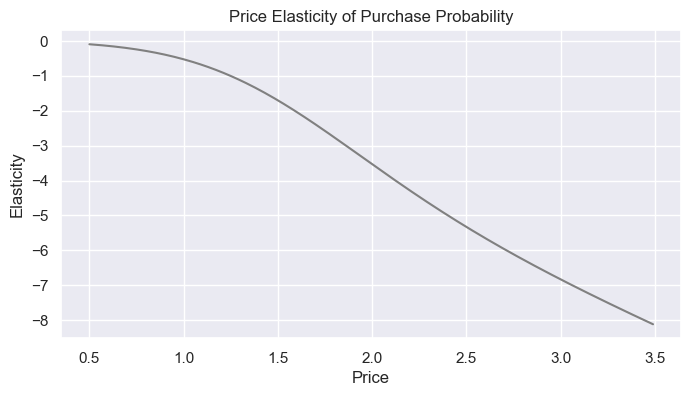

In [76]:
# We display the price elasticity of purchase probability of the average customer.
# We observe that the price elasticities are all negative. Furthermore we can spot where the customer becomes inelastic.
# But to find the precise spot we can consult the price elasticities data frame.
plt.figure(figsize = (8, 4))
plt.plot(df_price_elasticities['Price_Point'], df_price_elasticities['Mean_PE'], color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability');

**Note**: the Price Elasticity decreases as Price increases. The higher the price of a product becomes, the less likely  it is that the people would buy it. The decrease in price is slow in the range 0.5 and 1.25 and then it becomes steeper as price increases. <br>
Price Elasticity is negative, because we used logreg coefficient to populate it. Because we have inverse relationship between price and purchase probability, our price elasticity is also negative. <br>
By definition, Elasticity measures the % change in Purchase Probability given % change in Price.
*Inelastic* is when percent change is greater than 100%, in other words |E| < 1 <br>
*Elastic*: |E| > 1
e.g. at point 1.1 price average customer has elasticity of -0.69. This means that for each increase in price by 1%, the probability of purchase will decrease by 0.69%. |-0.69| < 1, therefore purchase probability at this point is inelastic.
e.g. at point 1.5 price, the elasticity is -1.7. Here, the 1% increase in price will decrease the probability of purchase by 1.7%. In this case, the elasticity of purchase probability is elastic.

**For inelastic values, the general recommendation is to increase the price as it wouldn't cause a significant decrease in purchase probability.**
**On the other hand, when elasticity is greater than 1 in absolute terms, we should decrease our prices.**

**Conclusion**: With prices lower than 1.25 USD, we can increase our product price without loosing too much in terms of purchase probability. With prices higher than 1.25 USD we are more to gain by reducing our prices.

![price_elasticity_interpretation.png](price_elasticity_interpretation.png)

### ${\textbf{Purchase Probability by Segments}}$

In [77]:
# Define dictionary to store each segment's price coefficient to compare elasticity
coef = {}
# We filter the data to contain only customers from each segment (0:standard, 1:career-focused, 2:fewer-opportunities, 3:well-off)
for i in df_pa['Segment'].unique():
    df_pa_segment = df_pa[df_pa['Segment'] == i]
    # Again we want to predict the purchase probability, so our Y variable is the incidence column.
    # Only here we select only the customers from the specific segment.
    Y = df_pa_segment['Incidence']
    # We calculate the average price for purchases in each segment. Our dependant variable contains the mean price of the brands.
    X = pd.DataFrame()
    X['Mean_Price'] = np.mean(df_pa_segment[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']], axis= 1)
    # Fit logistic regression model
    model_incidence_segment = LogisticRegression(solver = 'sag')
    model_incidence_segment.fit(X, Y)
    coef[i] = model_incidence_segment.coef_[:, 0]
    # Calculate Price Elasticity of each segment.
    Y_segment = model_incidence_segment.predict_proba(df_price_range)
    purchase_pr_segment = Y_segment[:, 1]
    pe_segment = model_incidence_segment.coef_[:, 0] * price_range * (1 - purchase_pr_segment)
    # Store the result in df_price_elasticities dataframe
    df_price_elasticities['PE_Segment_' + str(i)] = pe_segment

In [78]:
# The coefficients for price. It is negative, signaling that with an increase in price, the purchase probability decreases.
# Smaller coef indicats to less purchase probability
coef

{2: array([-3.64021686]),
 3: array([-1.24602219]),
 1: array([-1.71222387]),
 0: array([-1.50815018])}

In [79]:
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_3,PE_Segment_1,PE_Segment_0
0,0.50,-0.096418,-0.030951,-0.168048,-0.119108,-0.211173
1,0.51,-0.100487,-0.032720,-0.172973,-0.123292,-0.217743
2,0.52,-0.104683,-0.034576,-0.177968,-0.127570,-0.224421
3,0.53,-0.109009,-0.036522,-0.183035,-0.131942,-0.231207
4,0.54,-0.113469,-0.038564,-0.188173,-0.136410,-0.238103


### ${\textbf{Results}}$

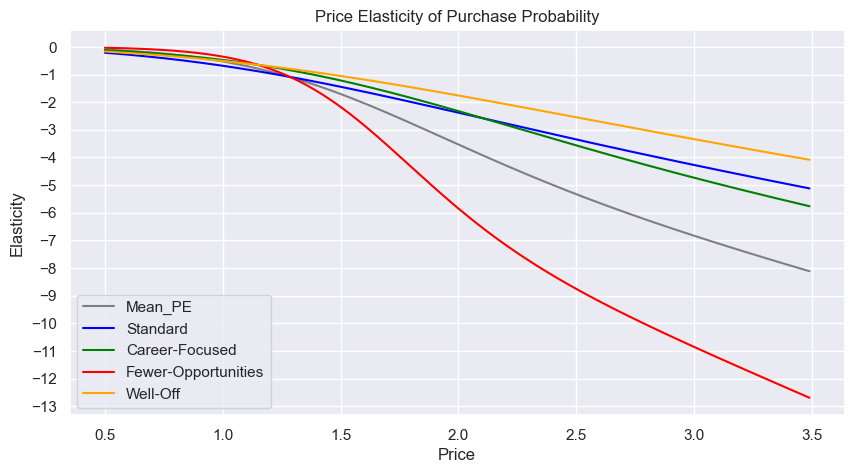

In [80]:
# We display all elasticities of purchase probability on the same plot. 
# We observe that the Well-Off segment are the least elastic when compared to the rest. 
# So, their purchase probability elasticity is not as affected by price.
# The price elasticities for the Standard segment seem to differ across price range. This may be due to the fact that
# the standard segment is least homogenous, which we discovered during our descriptive analysis. 
# It may be that the customers in this segment have different shopping habbits, which is why their 
# customers start with being more elastic than average but then shift to being more inelastic than the average customer
# and indeed the Career-focused segment.
plt.figure(figsize = (10, 5))
plt.plot(df_price_elasticities['Price_Point'], df_price_elasticities['Mean_PE'], color= 'grey')
plt.plot(df_price_elasticities['Price_Point'], df_price_elasticities['PE_Segment_0'], color= 'blue')
plt.plot(df_price_elasticities['Price_Point'], df_price_elasticities['PE_Segment_1'], color= 'green')
plt.plot(df_price_elasticities['Price_Point'], df_price_elasticities['PE_Segment_2'], color= 'red')
plt.plot(df_price_elasticities['Price_Point'], df_price_elasticities['PE_Segment_3'], color= 'orange')
plt.yticks(range(-13, 1))
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.legend(['Mean_PE', 'Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off']);

In [81]:
# prices for each segment above which they become elastic (sensetive to price change)
elastic_price_Mean_PE = np.min(df_price_elasticities[abs(df_price_elasticities['Mean_PE']) >= 1]['Price_Point'])
elastic_price_PE_Segment_0 = np.min(df_price_elasticities[abs(df_price_elasticities['PE_Segment_0']) >= 1]['Price_Point'])
elastic_price_PE_Segment_1 = np.min(df_price_elasticities[abs(df_price_elasticities['PE_Segment_1']) >= 1]['Price_Point'])
elastic_price_PE_Segment_2 = np.min(df_price_elasticities[abs(df_price_elasticities['PE_Segment_2']) >= 1]['Price_Point'])
elastic_price_PE_Segment_3 = np.min(df_price_elasticities[abs(df_price_elasticities['PE_Segment_3']) >= 1]['Price_Point'])

print(f"Tipping point for price elasticity Mean_PE Segment: {np.round(elastic_price_Mean_PE, 2)} USD")
print(f"Tipping point for price elasticity Standard Segment: {np.round(elastic_price_PE_Segment_0, 2)} USD")
print(f"Tipping point for price elasticity Career-Focused Segment: {np.round(elastic_price_PE_Segment_1, 2)} USD")
print(f"Tipping point for price elasticity Fewer-Opportunities Segment: {np.round(elastic_price_PE_Segment_2, 2)} USD")
print(f"Tipping point for price elasticity Well-Off Segment: {np.round(elastic_price_PE_Segment_3, 2)} USD")

Tipping point for price elasticity Mean_PE Segment: 1.25 USD
Tipping point for price elasticity Standard Segment: 1.23 USD
Tipping point for price elasticity Career-Focused Segment: 1.39 USD
Tipping point for price elasticity Fewer-Opportunities Segment: 1.27 USD
Tipping point for price elasticity Well-Off Segment: 1.46 USD


**Conclusion**: Fewer Opportunities segment is the most price sensitive compared to other segments. This segment has very steep decrease, meaning that with increase in price, they become more and more elastic much faster. The tipping point between elasticity and inelasticity for Fewer Opportunities segment is 1.27 USD. And maybe it is more inelastic in the beginning because it has more data volume than other segments or due to consumer behaviour (maybe they like chocolate very much such they can bear with the price increase at first)

## ${\textbf{Purchase Probability with Promotion Feature}}$

### ${\textbf{Data Preparation}}$

In [82]:
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = np.mean(df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']], axis= 1)

In [83]:
# We include a second promotion feature. We'd like to examine the effects of promotions on purchase probability.
# We calculate the average promotion rate across the five brands. We add the mean price for the brands.
X['Mean_Promotion'] = np.mean(df_pa[['Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5']], axis= 1)
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


## ${\textbf{Model Estimation}}$

In [84]:
# The coefficient for promotion is positive. 
# Therefore, there is a positive relationship between promotion and purchase probability.
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49403842,  0.56157477]])

## ${\textbf{Price Elasticity with Promotion}}$

In [85]:
# We create a data frame on which our model will predict. We need to include A price and promotion feature.
# First, we'll include the price range as the price feature. Next, we'll include the promotion feature.
df_price_elasticity_promotion = df_price_range
df_price_elasticity_promotion.rename(columns = {0: "Price_Range"}, inplace= True)

In [86]:
# We'll calculate price elasticities of purchase probability when we assume there is a promotion across at each price points.
df_price_elasticity_promotion['Promotion'] = 1

df_price_elasticity_promotion.head(1)

,Price_Range,Promotion
0,0.5,1


In [87]:
# Purchase Probability with Promotion Model Prediction
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion.values)

In [88]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [89]:
# Update master data to include elasticities of purchase probability with promotion feature
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_3,PE_Segment_1,PE_Segment_0,Elasticity_Promotion_1
0,0.50,-0.096418,-0.030951,-0.168048,-0.119108,-0.211173,-0.125724
1,0.51,-0.100487,-0.032720,-0.172973,-0.123292,-0.217743,-0.129839
2,0.52,-0.104683,-0.034576,-0.177968,-0.127570,-0.224421,-0.134034
3,0.53,-0.109009,-0.036522,-0.183035,-0.131942,-0.231207,-0.138309
4,0.54,-0.113469,-0.038564,-0.188173,-0.136410,-0.238103,-0.142665


## ${\textbf{Price Elasticity without Promotion}}$

In [90]:
df_price_elasticity_promotion_no = df_price_range
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [91]:
# Promotion feature -No Promotion.
# We assume there aren't any promotional activities on any of the price points.
# We examine the elasticity of purchase probability when there isn't promotion.
df_price_elasticity_promotion_no['Promotion'] = 0
df_price_elasticity_promotion_no.head(1)

,Price_Range,Promotion
0,0.5,0


In [92]:
#Purchase Probability without Promotion Model Prediction
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no.values)

In [93]:
no_promo = Y_no_promo[: , 1]
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range * (1 - no_promo)

In [94]:
# Update master data frame to include purchase probability elasticities without promotion.
# We can now see the values with and without promotion and compare them for each price point in our price range.
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

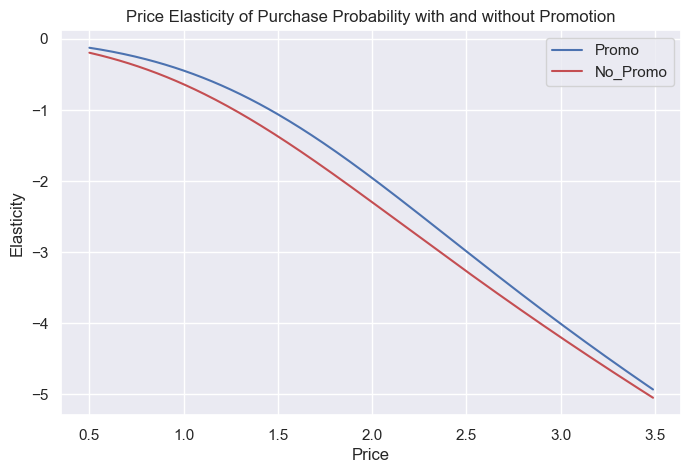

In [95]:
# Plot purchase elasticities with and without promotion side by side for comprarisson.
# Here we observe that the purchase probability elasticity of the customer is less elastic when there is promotion.
# This is an important insight for marketers, as according to our model people are more likely to buy a product if there is
# some promotional activity rather than purchase a product with the same price, when it isn't on promotion. 
plt.figure(figsize = (8, 5))
plt.plot(price_range, price_elasticity_promo, color= 'b')
plt.plot(price_range, price_elasticity_no_promo, color= 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')
plt.legend(['Promo', 'No_Promo']);

In [96]:
elastic_price_promo = np.min(df_price_elasticities[abs(df_price_elasticities['Elasticity_Promotion_1']) >= 1]['Price_Point'])
elastic_price_nopromo = np.min(df_price_elasticities[abs(df_price_elasticities['Elasticity_Promotion_0']) >= 1]['Price_Point'])

print(f"Tipping point for price elasticity with promotion: {np.round(elastic_price_promo, 2)} USD")
print(f"Tipping point for price elasticity without promotion: {np.round(elastic_price_nopromo, 2)} USD")

Tipping point for price elasticity with promotion: 1.46 USD
Tipping point for price elasticity without promotion: 1.27 USD


**Conclusion**: the graph represents elasticity given maximum and minimum promotional activities.

If the product has a regular price of 1.30 USD (i.e. without promotion), its purchase probability is elastic.
However, if the product costs 1.50 USD and its price is reduced to 1.30 USD during promotion, then our analysis says that the purchase probability is still inelastic at this price point.

Customers are less price sensitive to price changes when there are promotional activities.

**Actionable insights**:
It would be more beneficial to have a higher original price and constant promotion rather than a lower original price.

# ${\textbf{Brand Choice}}$

### ${\textbf{Data Preparation}}$

In [97]:
def brandDataFrame(brand, calc_beta=None, cross=False, segment=None):
    # Here we create a data frame with price columns, which our model will use to predict the brand choice probabilities.
    features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
    # Here we are interested in determining the brand choice of the customer. 
    # Hence, we filter our data, to include only purchase occasion, when a purchase has occured. 
    brand_choice = df_pa[df_pa['Incidence'] == 1]
    if segment:
        brand_choice = brand_choice[brand_choice['Segment'] == segment]
    # Brand Choice Model estimation.
    Y = brand_choice['Brand']
    brand_choice = pd.get_dummies(brand_choice, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
    X = brand_choice[features]
    model_brand = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
    model_brand.fit(X, Y)
    
    if calc_beta:    
        # We create a pandas data frame, which contains to coefficients.
        bc_coef = pd.DataFrame(np.around(model_brand.coef_, 2), columns= features, 
                               index= ['Coef_Brand_' + str(i) for i in range(1, len(model_brand.coef_[0])+1)]).T
        global beta
        beta = bc_coef.iloc[calc_beta-1, calc_beta-1]
    df = pd.DataFrame(index = np.arange(price_range.size))
    c = features.pop(brand-1)
    for col in features:
        df[col] = np.mean(brand_choice[col])
    df.insert(brand-1, c, price_range)
    # Brand Choice Model prediction.
    predict_brand = model_brand.predict_proba(df)
    # Our model returns the probabilities of choosing each of the brand.
    pr_brand = predict_brand[:, brand-1]
    if cross:
        # calculate the cross brand price elasticity
        price_elasticity_brand = -beta * price_range * pr_brand
    # Calculating price elasticities for brand choice
    else:
        price_elasticity_brand = beta * price_range * (1 - pr_brand)
    return df, price_elasticity_brand

## ${\textbf{Own Price Elasticity Brand 5}}$

In [98]:
# We want to calculate price elasticity of brand choice.
# Here we create a data frame with price columns, which our model will use to predict the brand choice probabilities.
# Adding the price elasticities to our master data frame. 
df_own_brand_5, df_price_elasticities['Brand_5'] = brandDataFrame(brand= 5, calc_beta= 5, cross=False, segment=None)
df_own_brand_5.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54


## ${\textbf{Cross Price Elasticity Brand 5, Cross Brand 4}}$

In [99]:
# We want to examine the effect of the changes in price of a competitor brand which comes closest to our own brand (brand 4). 
# Therefore, we need to examine changes in the price of this brand.
# Keep in mind, we could examine the cross price elasticities for any of the remaining brands, 
# we just need to update this data frame accordingly to contain the respective brand.
df_brand5_cross_brand4, df_price_elasticities['Brand_5_Cross_Brand_4'] = brandDataFrame(brand=4, calc_beta=None, cross=True, segment=None)

# ${\textbf{Own and Cross-Price Elasticity by Segment}}$

## $\color{orange}{\text{Well-Off}}$

### $\color{orange}{\text{Own-Brand Price Elasticity}}$

In [100]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s3, df_price_elasticities['Brand 5 S3'] = brandDataFrame(brand=5, calc_beta=None, cross=False, segment=3)

### $\color{orange}{\text{Cross-Brand Price Elasticity}}$

In [101]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3, df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brandDataFrame(brand=4, calc_beta=None, cross=True, segment=3)

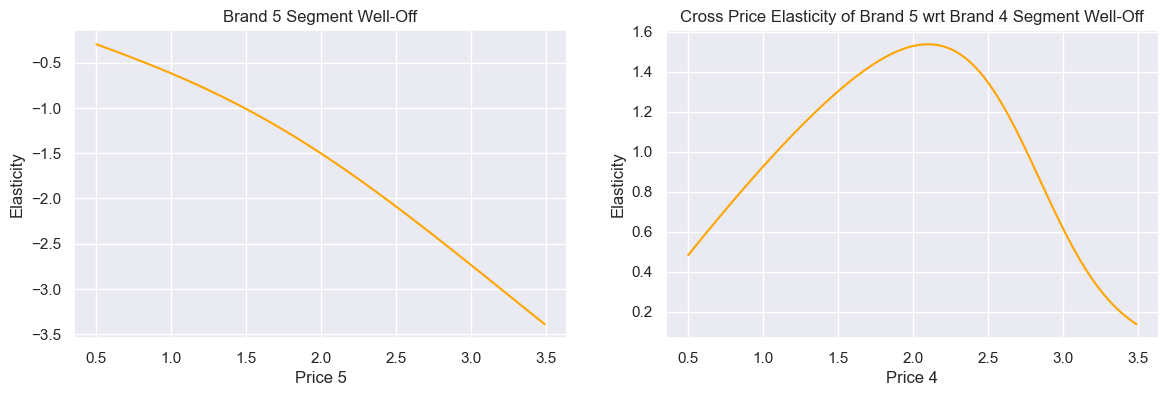

In [102]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, df_price_elasticities['Brand 5 S3'], color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, df_price_elasticities['Brand_5_Cross_Brand_4_S3'], color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

## $\color{blue}{\text{Standard}}$

### $\color{blue}{\text{Own-Brand Price Elasticity}}$

In [103]:
# Here we are interesting in analysing the brand choice probability of the Standard segment.
# We filter our data, by selecting only purchases from segment 0.
df_own_brand_5_s0, df_price_elasticities['Brand 5 S0'] = brandDataFrame(brand=5, calc_beta=None, cross=False, segment=0)

### $\color{blue}{\text{Cross-Brand Price Elasticity}}$

In [104]:
df_brand5_cross_brand4_s0, df_price_elasticities['Brand_5_Cross_Brand_4_S0'] = brandDataFrame(brand=4, calc_beta=None, cross=True, segment=0)

## $\color{green}{\text{Career-Focused}}$

### $\color{green}{\text{Own-Brand Price Elasticity}}$

In [105]:
df_own_brand_5_s1, df_price_elasticities['Brand 5 S1'] = brandDataFrame(brand=5, calc_beta=None, cross=False, segment=1)

### $\color{green}{\text{Cross-Brand Price Elasticity}}$

In [106]:
df_brand5_cross_brand4_s1, df_price_elasticities['Brand_5_Cross_Brand_4_S1'] = brandDataFrame(brand=4, calc_beta=None, cross=True, segment=1)

## $\color{red}{\text{Fewer-Opportunities}}$

### $\color{red}{\text{Own-Brand Price Elasticity}}$

In [107]:
df_own_brand_5_s2, df_price_elasticities['Brand 5 S2'] = brandDataFrame(brand=5, calc_beta=None, cross=False, segment=2)

### $\color{red}{\text{Cross-Brand Price Elasticity}}$

In [108]:
df_brand5_cross_brand4_s2, df_price_elasticities['Brand_5_Cross_Brand_4_S2'] = brandDataFrame(brand=4, calc_beta=None, cross=True, segment=2)

In [109]:
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_3,PE_Segment_1,PE_Segment_0,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2
0,0.50,-0.096418,-0.030951,-0.168048,-0.119108,-0.211173,-0.125724,-0.195640,-0.049056,0.332011,-0.297340,0.482421,-0.049056,0.332011,-0.043940,0.194764,-0.001036,0.181594
1,0.51,-0.100487,-0.032720,-0.172973,-0.123292,-0.217743,-0.129839,-0.201761,-0.050617,0.337288,-0.303386,0.491726,-0.050617,0.337287,-0.045027,0.197248,-0.001098,0.183891
2,0.52,-0.104683,-0.034576,-0.177968,-0.127570,-0.224421,-0.134034,-0.207985,-0.052207,0.342507,-0.309442,0.501016,-0.052207,0.342507,-0.046123,0.199681,-0.001163,0.186139
3,0.53,-0.109009,-0.036522,-0.183035,-0.131942,-0.231207,-0.138309,-0.214312,-0.053828,0.347669,-0.315510,0.510290,-0.053827,0.347668,-0.047229,0.202063,-0.001231,0.188338
4,0.54,-0.113469,-0.038564,-0.188173,-0.136410,-0.238103,-0.142665,-0.220743,-0.055478,0.352773,-0.321588,0.519548,-0.055478,0.352773,-0.048344,0.204395,-0.001303,0.190489


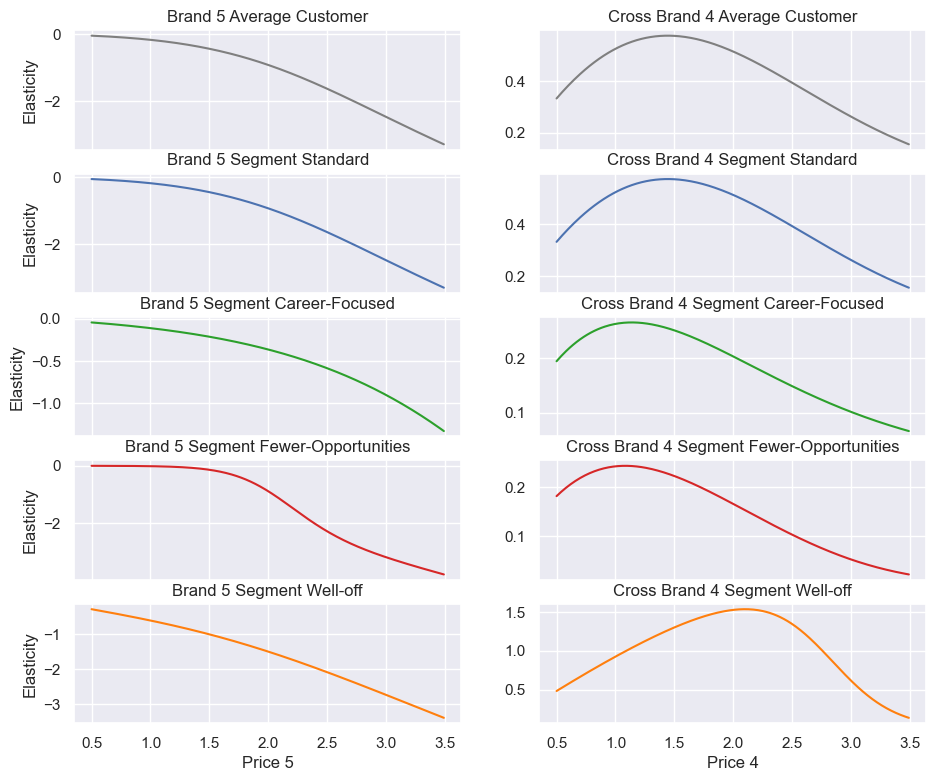

In [110]:
# We plot the own and cross brand price elasticities for the average customer and each of the four segments.
# We can observe differences and similiraties between the segments and examine their preference, when it comes to brand choice.
# The two segments, which seem to be of most interested for the marketing team of brand 5, seem to be the Career-focused
# and the Well-off. They are also the segments which purchase this brand most often. 
# The Career-focused segment is the most inelastic and they are the most loyal segment. 
# Based on our model, they do not seem to be that affected by price, therefore brand 5 could increase its price, 
# without fear of significant loss of customers from this segment. 
# The Well-off segment on the other hand, seems to be more elastic. They also purchase the competitor brand 4 most often.
# In order to target this segment, our analysis signals, that price needs to be decreased. However, keep in mind 
# that other factors aside from price might be influencing the purchase behaivour of this segment.
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, df_price_elasticities['Brand_5'], 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, df_price_elasticities['Brand_5_Cross_Brand_4'], 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, df_price_elasticities['Brand 5 S0'])
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, df_price_elasticities['Brand_5_Cross_Brand_4_S0'])
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, df_price_elasticities['Brand 5 S1'], 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, df_price_elasticities['Brand_5_Cross_Brand_4_S1'], 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, df_price_elasticities['Brand 5 S2'], 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, df_price_elasticities['Brand_5_Cross_Brand_4_S2'], 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, df_price_elasticities['Brand 5 S3'], 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, df_price_elasticities['Brand_5_Cross_Brand_4_S3'], 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4');

### for average customer Here we examine the cross price elasticity of purchase probability for brand 5 with respect to brand 4. We observe they are positive. As the price of the competitor brand increases, so does the probability for purchasing our own brand. Even though the elasticity starts to decrease from the 1.45 mark, it is still positive, signalling that the increase in purchase probability for the own brand happens more slowly.

# ${\textbf{Price Elasticity of Purchase Quantity}}$

In [111]:
# We want to determine price elasticity of purchase quantity, also known as price elasticity of demand.
# We are interested in purchase ocassion, where the purchased quantity is different from 0.
# Therefore, once again we filter our data to contain only shopping visits where the client has purchased at least one product.
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0


In [112]:
# Create brand dummies, for each of the five brands.
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')

df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.581910,0.175229,0.299290,0.293824,0.231657,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.028171,0.380176,0.457962,0.455528,0.421906,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### The descriptive analysis of the purchase quantitiy data frame, shows that quantity ranges from 1 to 15 and has an average value of 2.8, Which means that many times our customers buy more than one chocolate candy bar.

In [113]:
# Here we make a decission on which features to include in our model. We decide to include a Price and a Promotion feature.
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [114]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [115]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

In [116]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
X.head()

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0


In [117]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [118]:
# Linear Regression Model
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [119]:
# The coefficients for price and promotion.
model_quantity.coef_

array([-0.8173651 , -0.10504673])

### The coefficients for price and promotion are both negative. It appears that promotion reflects negatively on the purchase quantity of the average client, which is unexpected.

## ${\textbf{Price Elasticity with Promotion}}$

In [120]:
# We examine the price elasticity of purchase quantity with active promotional activities for each price point.
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [121]:
#Take the coefficient for price.
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.817365101668501

In [122]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [123]:
# We calculate the price elasticity with our new formula. It is the beta coefficient for price multiplied by price
# and divided by the purchase quantity.
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [124]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_3,PE_Segment_1,PE_Segment_0,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,PE_Quantity_Promotion_1
0,0.50,-0.096418,-0.030951,-0.168048,-0.119108,-0.211173,-0.125724,-0.195640,-0.049056,0.332011,-0.297340,0.482421,-0.049056,0.332011,-0.043940,0.194764,-0.001036,0.181594,-0.102157
1,0.51,-0.100487,-0.032720,-0.172973,-0.123292,-0.217743,-0.129839,-0.201761,-0.050617,0.337288,-0.303386,0.491726,-0.050617,0.337287,-0.045027,0.197248,-0.001098,0.183891,-0.104413
2,0.52,-0.104683,-0.034576,-0.177968,-0.127570,-0.224421,-0.134034,-0.207985,-0.052207,0.342507,-0.309442,0.501016,-0.052207,0.342507,-0.046123,0.199681,-0.001163,0.186139,-0.106679
3,0.53,-0.109009,-0.036522,-0.183035,-0.131942,-0.231207,-0.138309,-0.214312,-0.053828,0.347669,-0.315510,0.510290,-0.053827,0.347668,-0.047229,0.202063,-0.001231,0.188338,-0.108954
4,0.54,-0.113469,-0.038564,-0.188173,-0.136410,-0.238103,-0.142665,-0.220743,-0.055478,0.352773,-0.321588,0.519548,-0.055478,0.352773,-0.048344,0.204395,-0.001303,0.190489,-0.111238


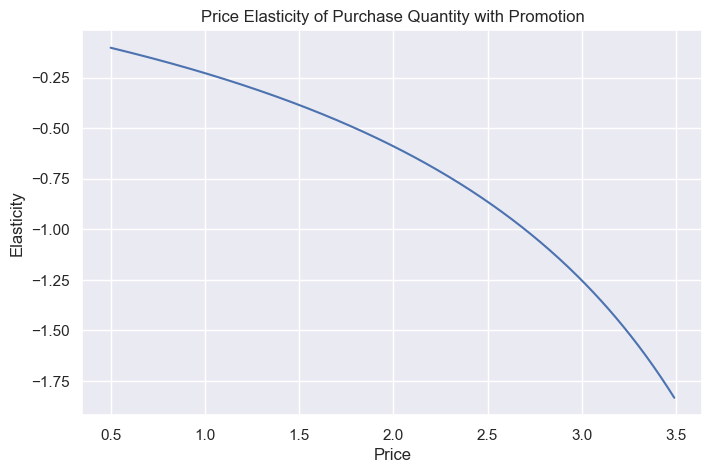

In [125]:
plt.figure(figsize = (8, 5))
plt.plot(price_range, df_price_elasticities['PE_Quantity_Promotion_1'])
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion');

## ${\textbf{Price Elasticity without Promotion}}$

In [126]:
# Overwrite promotion incidence in order to use the same df. 
# Here we assume there are no promotinal activities active for the entire price range.
df_price_elasticity_quantity['Promotion_Incidence'] = 0
# Find the new predicted quantities.
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
# Calculate the new price elasticities.
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
# Add the results to the master data frame.
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_2,PE_Segment_3,PE_Segment_1,PE_Segment_0,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096418,-0.030951,-0.168048,-0.119108,-0.211173,-0.125724,-0.195640,-0.049056,0.332011,-0.297340,0.482421,-0.049056,0.332011,-0.043940,0.194764,-0.001036,0.181594,-0.102157,-0.099543
1,0.51,-0.100487,-0.032720,-0.172973,-0.123292,-0.217743,-0.129839,-0.201761,-0.050617,0.337288,-0.303386,0.491726,-0.050617,0.337287,-0.045027,0.197248,-0.001098,0.183891,-0.104413,-0.101736
2,0.52,-0.104683,-0.034576,-0.177968,-0.127570,-0.224421,-0.134034,-0.207985,-0.052207,0.342507,-0.309442,0.501016,-0.052207,0.342507,-0.046123,0.199681,-0.001163,0.186139,-0.106679,-0.103939
3,0.53,-0.109009,-0.036522,-0.183035,-0.131942,-0.231207,-0.138309,-0.214312,-0.053828,0.347669,-0.315510,0.510290,-0.053827,0.347668,-0.047229,0.202063,-0.001231,0.188338,-0.108954,-0.106150
4,0.54,-0.113469,-0.038564,-0.188173,-0.136410,-0.238103,-0.142665,-0.220743,-0.055478,0.352773,-0.321588,0.519548,-0.055478,0.352773,-0.048344,0.204395,-0.001303,0.190489,-0.111238,-0.108369


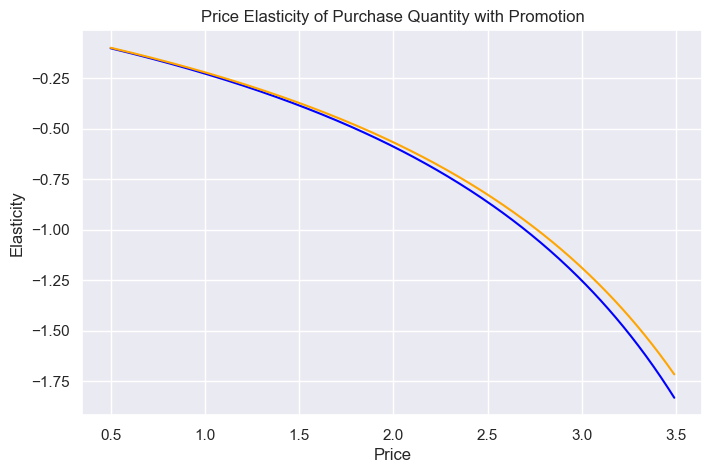

In [127]:
# Plot the two elasticities side by side. 
# We observe that the two elasticities are very close together for almost the entire price range.
# It appears that promotion does not appear to be a significant factor in the customers' decission 
# what quantity of chocolate candy bars to purchase.
plt.figure(figsize = (8, 5))
plt.plot(price_range, df_price_elasticities['PE_Quantity_Promotion_1'], color = 'blue')
plt.plot(price_range, df_price_elasticities['PE_Quantity_Promotion_0'], color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion');